Ratio proxy of l^-0.42 is 1.60
Ratio proxy of l^-0.54 is 1.83


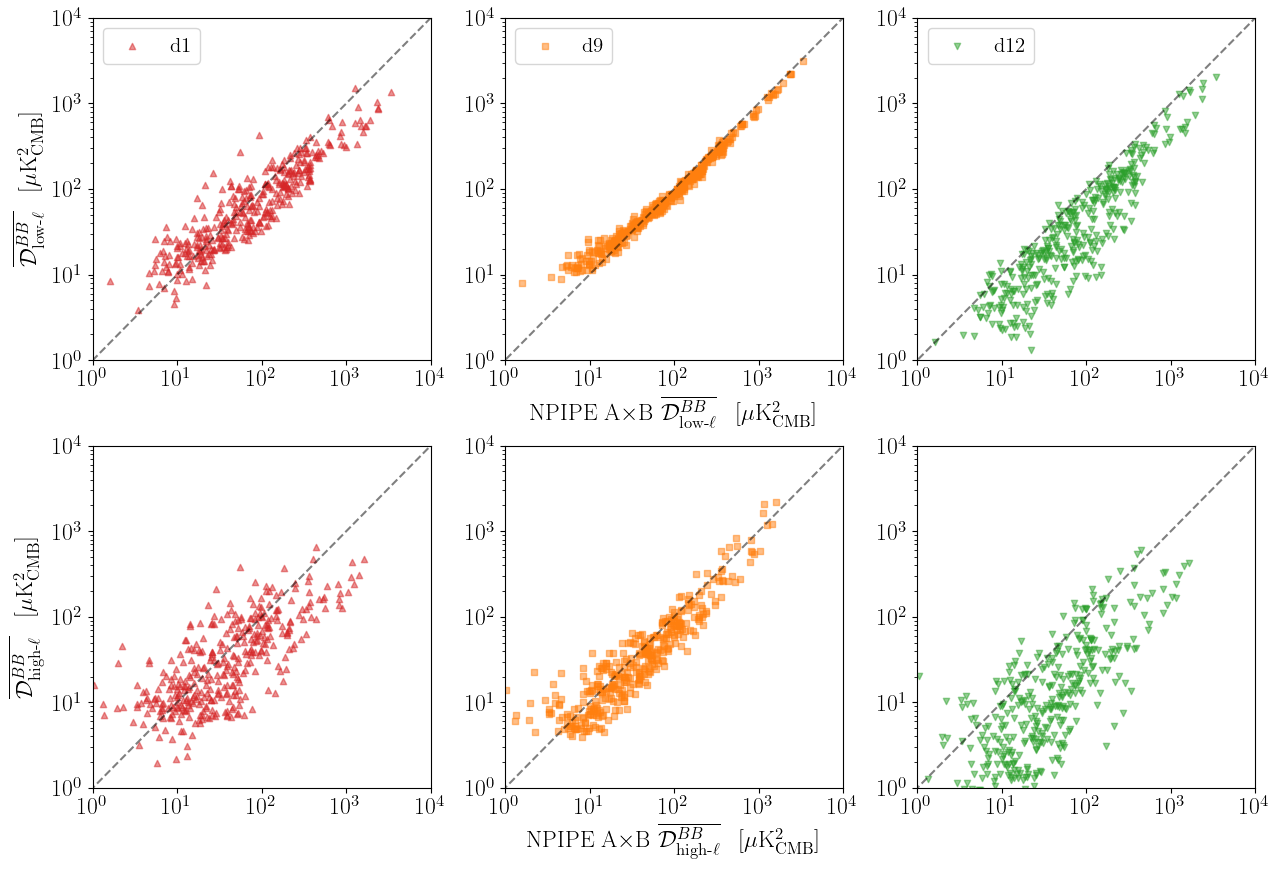

In [1]:
# 20240825:
# Plotting BB band powers scatter plots of 
# 1. mean-low PySM model  vs. mean-low NPIPE data 
# 2. mean-high PySM model vs. mean-high NPIPE data
# showing the results of PR4 data split maps and PySM sim maps from all small fields
#
# Note: run it in Python3

import numpy as np
import scipy as sp
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import matplotlib as mpl

def ratio_proxy_calc(alphaBB):
    '''Function for calulating the ratio proxy 
    for power-law D_l with the index alphaBB
    '''

    bins = np.array([40,70,110,160,220,290,370])
    ell = np.arange(2,371)
    dl_ideal = ell**alphaBB
    bdl_ideal = np.zeros(np.array(bins).size-1)
    for j in range(len(bins)-1):
         idx = np.where((ell>=bins[j]) & (ell<bins[j+1]))
         bdl_ideal[j] = np.mean(dl_ideal[idx])
    ratio_proxy = np.mean(bdl_ideal[:2])/np.mean(bdl_ideal[2:6])

    return ratio_proxy

if __name__ == "__main__":

    # Change font globally
    #rc('font',**{'family':'serif', 'size': 12})
    #rc('font',**{'family':'serif', 'size': 12})
    mpl.rc('font',**{'family':'serif'})

    # For \text command
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

    # Show plot
    plt.ion()

    ##### Read Data ######

    # Real data - Planck PR4 353 GHz detector split
    # Use detector-split because it is truly independent
    txtname = 'data/smallfield_DS_dl_400sd.txt' 
    # Get lc, dl and A^BB
    txtarray = np.loadtxt(txtname)
    lc = txtarray[:,0:6]
    dlbb_data = txtarray[:,18:24]
    # Restrict to |b| > 30 degrees
    dlbb_data_cut = dlbb_data.copy()
    for k in range(768):
        [theta,phi] = hp.pix2ang(8,k)
        theta = np.rad2deg(theta)

        if (theta >= 90.-30. and theta <= 90.+30.):
            dlbb_data_cut[k,:] = np.nan
    # Take average of first two band powers and the last four band powers
    lmean_data  = np.mean(dlbb_data_cut[:,0:2],1)
    hmean_data  = np.mean(dlbb_data_cut[:,2:6],1)
    # Take an extra step to remove the only negative value
    field_idx = np.where((lmean_data < 0) | (hmean_data < 0))
    lmean_data[field_idx] = np.nan
    hmean_data[field_idx] = np.nan
    lmean_data = lmean_data[~np.isnan(lmean_data)]
    hmean_data = hmean_data[~np.isnan(hmean_data)]

    # D1 model
    txtname = 'data/pysm_3p4p0b9/smallfield_d1_dl_400sd.txt'
    txtarray = np.loadtxt(txtname)
    dlbb_d1 = txtarray[:,18:24]
    # Restrict to |b| > 30 degrees
    dlbb_d1_cut = dlbb_d1.copy()
    for k in range(768):
        [theta,phi] = hp.pix2ang(8,k)
        theta = np.rad2deg(theta)

        if (theta >= 90.-30. and theta <= 90.+30.):
            dlbb_d1_cut[k,:] = np.nan
    # Take average of first two band powers and the last four band powers
    # Remove nan data as well
    lmean_d1  = np.mean(dlbb_d1_cut[:,0:2],1)
    hmean_d1  = np.mean(dlbb_d1_cut[:,2:6],1)
    lmean_d1[field_idx] = np.nan
    hmean_d1[field_idx] = np.nan
    lmean_d1 = lmean_d1[~np.isnan(lmean_d1)]
    hmean_d1 = hmean_d1[~np.isnan(hmean_d1)]

    # D9 model
    txtname = 'data/pysm_3p4p0b9/smallfield_d9_dl_400sd.txt'
    txtarray = np.loadtxt(txtname)
    dlbb_d9 = txtarray[:,18:24]
    # Restrict to |b| > 30 degrees
    dlbb_d9_cut = dlbb_d9.copy()
    for k in range(768):
        [theta,phi] = hp.pix2ang(8,k)
        theta = np.rad2deg(theta)

        if (theta >= 90.-30. and theta <= 90.+30.):
            dlbb_d9_cut[k,:] = np.nan
    # Take average of first two band powers and the last four band powers
    # Remove nan data as well
    lmean_d9  = np.mean(dlbb_d9_cut[:,0:2],1)
    hmean_d9  = np.mean(dlbb_d9_cut[:,2:6],1)
    lmean_d9[field_idx] = np.nan
    hmean_d9[field_idx] = np.nan
    lmean_d9 = lmean_d9[~np.isnan(lmean_d9)]
    hmean_d9 = hmean_d9[~np.isnan(hmean_d9)]

    # D12 model
    txtname = 'data/pysm_3p4p0b9/smallfield_d12_dl_400sd.txt'
    txtarray = np.loadtxt(txtname)
    dlbb_d12 = txtarray[:,18:24]
    # Restrict to |b| > 30 degrees
    dlbb_d12_cut = dlbb_d12.copy()
    for k in range(768):
        [theta,phi] = hp.pix2ang(8,k)
        theta = np.rad2deg(theta)

        if (theta >= 90.-30. and theta <= 90.+30.):
            dlbb_d12_cut[k,:] = np.nan
    # Take average of first two band powers and the last four band powers
    # Remove nan data as well
    lmean_d12 = np.mean(dlbb_d12_cut[:,0:2],1)
    hmean_d12 = np.mean(dlbb_d12_cut[:,2:6],1)
    lmean_d12[field_idx] = np.nan
    hmean_d12[field_idx] = np.nan
    lmean_d12 = lmean_d12[~np.isnan(lmean_d12)]
    hmean_d12 = hmean_d12[~np.isnan(hmean_d12)]

    # Calculate the ratio proxy of l^-0.42
    print("Ratio proxy of l^{:.2f} is {:.2f}".format(-0.42,ratio_proxy_calc(-0.42)))
    # Calculate the ratio proxy of l^-0.54
    print("Ratio proxy of l^{:.2f} is {:.2f}".format(-0.54,ratio_proxy_calc(-0.54)))

    ##### Ploting #####
    numrow = 2
    numcol = 3
    fig, axs = plt.subplots(numrow,numcol,figsize=(15.0,10.0))
    # Add space for xlables and ylabels
    plt.subplots_adjust(hspace=0.25)
    plt.subplots_adjust(wspace=0.22)

    # Plotting 3 rows
    for ii in np.arange(numrow): 

        if ii == 0:
            # First row: mean-low model vs. mean-low data BB band power
            p0 = axs[0,0].scatter(lmean_data,lmean_d1, s=20,c='tab:red',marker="^",alpha=0.5)
            p1 = axs[0,1].scatter(lmean_data,lmean_d9, s=20,c='tab:orange',marker="s",alpha=0.5)
            p2 = axs[0,2].scatter(lmean_data,lmean_d12,s=20,c='tab:green',marker="v",alpha=0.5)
            axs[0,0].legend([p0],['d1'],fontsize=15)
            axs[0,1].legend([p1],['d9'],fontsize=15)
            axs[0,2].legend([p2],['d12'],fontsize=15)
            axs[0,1].set_xlabel(r'NPIPE A$\times$B $\overline{\mathcal{D}_{\text{low-}\ell}^{BB}}$ \, [$\mu \mathrm{K^2_{CMB}}$]',
                                fontsize=17,labelpad=5)
            axs[0,0].set_ylabel(r'$\overline{\mathcal{D}_{\text{low-}\ell}^{BB}}$ \: [$\mu \mathrm{K^2_{CMB}}$]',
                                fontsize=17,labelpad=7)

        else:
            # Second row: mean-high model vs. mean-high data BB band power
            axs[1,0].scatter(hmean_data,hmean_d1, s=20,c='tab:red',marker="^",alpha=0.5)
            axs[1,1].scatter(hmean_data,hmean_d9, s=20,c='tab:orange',marker="s",alpha=0.5)
            axs[1,2].scatter(hmean_data,hmean_d12,s=20,c='tab:green',marker="v",alpha=0.5)
            axs[1,1].set_xlabel(r'NPIPE A$\times$B $\overline{\mathcal{D}_{\text{high-}\ell}^{BB}}$ \, [$\mu \mathrm{K^2_{CMB}}$]',
                                fontsize=17,labelpad=5)
            axs[1,0].set_ylabel(r'$\overline{\mathcal{D}_{\text{high-}\ell}^{BB}}$ \: [$\mu \mathrm{K^2_{CMB}}$]',
                                fontsize=17,labelpad=7)

        for jj in np.arange(numcol):

            # Add a 1:1 reference
            xseq = np.linspace(0, 1e4, num=10000)
            axs[ii,jj].plot(xseq,xseq,color="k",linestyle="--",alpha=0.5)
            axs[ii,jj].loglog()
            axs[ii,jj].set_xlim([1e0,1e4])
            axs[ii,jj].set_ylim([1e0,1e4])
            axs[ii,jj].set_xticks([1e0,1e1,1e2,1e3,1e4])

            axs[ii,jj].xaxis.set_tick_params(direction="out",which="both",labelsize=17)
            axs[ii,jj].yaxis.set_tick_params(direction="out",which="both",labelsize=17)

    plt.savefig('llmean_hlmean_comparison.pdf',bbox_inches='tight')